In [59]:
%config InlineBackend.figure_format = 'retina'
import xarray as xr
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
import cartopy.crs as ccrs
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import numpy as np

In [2]:
ds_mask = xr.open_dataset('/downscaling/VCSN/NZ_6_regions_mask.nc')

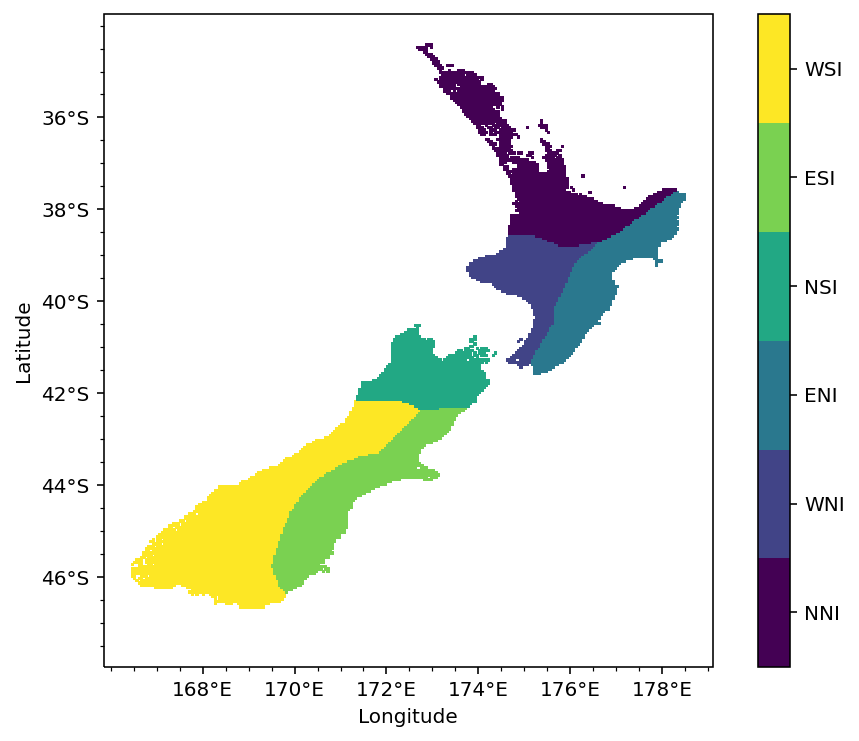

In [68]:
plt.figure(figsize=(8, 6))
ax = plt.axes(projection=ccrs.PlateCarree())

ax.set_xticks(range(168, 179, 2), crs=ccrs.PlateCarree())
ax.set_yticks(range(-46, -34, 2), crs=ccrs.PlateCarree())
lon_formatter = LongitudeFormatter(zero_direction_label=True)
lat_formatter = LatitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)
ax.xaxis.set_minor_locator(MultipleLocator(0.5))
ax.yaxis.set_major_formatter(lat_formatter)
ax.yaxis.set_minor_locator(MultipleLocator(0.5))

im = ds_mask.region.plot(ax=ax, transform=ccrs.PlateCarree(), cmap=plt.cm.get_cmap('viridis', 6), add_colorbar=False)

ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

cb = plt.colorbar(im)

cb.set_ticks(np.arange(5/12, 5, 5/6).astype(list))
cb.set_ticklabels(['NNI', 'WNI', 'ENI', 'NSI', 'ESI', 'WSI'])

plt.savefig('saved_images/vcsn-masks.pdf')
plt.show()